In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [14]:
# (a) Read the data set into a data frame.

data = pd.read_csv("datasets/regression-data-set.csv")
data

,x,y
0,1.00,3.14
1,1.14,3.17
2,1.28,3.09
3,1.42,3.08
4,1.57,3.09
...,...,...
95,14.43,2.99
96,14.58,2.92
97,14.72,2.88
98,14.86,2.90


In [15]:
# (b) Convert the x and y columns into numpy arrays

x = np.array(data["x"])
y = np.array(data["y"])
print(x,"\n\n",y)

[ 1.    1.14  1.28  1.42  1.57  1.71  1.85  1.99  2.13  2.27  2.41  2.56
  2.7   2.84  2.98  3.12  3.26  3.4   3.55  3.69  3.83  3.97  4.11  4.25
  4.39  4.54  4.68  4.82  4.96  5.1   5.24  5.38  5.53  5.67  5.81  5.95
  6.09  6.23  6.37  6.52  6.66  6.8   6.94  7.08  7.22  7.36  7.51  7.65
  7.79  7.93  8.07  8.21  8.35  8.49  8.64  8.78  8.92  9.06  9.2   9.34
  9.48  9.63  9.77  9.91 10.05 10.19 10.33 10.47 10.62 10.76 10.9  11.04
 11.18 11.32 11.46 11.61 11.75 11.89 12.03 12.17 12.31 12.45 12.6  12.74
 12.88 13.02 13.16 13.3  13.44 13.59 13.73 13.87 14.01 14.15 14.29 14.43
 14.58 14.72 14.86 15.  ] 

 [3.14 3.17 3.09 3.08 3.09 3.03 3.1  2.96 3.04 3.05 3.03 3.05 2.95 2.94
 2.89 2.87 2.98 2.91 3.01 3.02 3.02 3.05 3.06 2.94 3.03 3.09 3.1  3.05
 3.05 3.09 3.12 3.19 3.2  3.15 3.25 3.18 3.19 3.27 3.23 3.32 3.24 3.29
 3.28 3.28 3.23 3.22 3.21 3.06 3.06 3.03 3.   3.02 3.04 3.   2.93 2.97
 2.88 2.89 2.92 2.86 2.78 2.88 2.81 2.92 2.95 2.84 2.94 3.03 2.96 3.06
 3.02 3.05 3.08 3.11 3.2  3.19 3

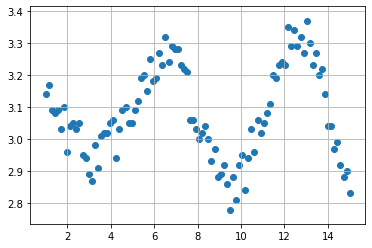

In [16]:
# (c) Make a scatter plot of y as a function of x

plt.grid()
plt.scatter(x,y) 

In [17]:
# (d) Write a function that will perform polynomial fits of multiple degrees (say 1, 2,
#      3, ..., n) for a single train/test split of the data and returns some measure of
#      the means square error (or another error measure that you like). You can either
#      calculate the error yourself or use a built in function.


def fit_a_polynomial(X,Y,degree):
    # split data 25/75 random data points
    x_train, x_test, y_train, y_test = train_test_split(X,Y)
    # returns polynomial coefficient(s)
    fit = np.polyfit(x_train, y_train, degree)
    # pass in coefficents and sequence of x vals, output is sequence of yvals
    y_predicted = np.polyval(fit, x_test)
    # MSE, sum squared errors
    error = mean_squared_error(y_test, y_predicted)
    
    return(error)

In [18]:
# (e)  Perform 100 train/test splits and collect the errors as a function of degree. You
#      will have 100 errors for each degree.


errors_lists = [list() for i in range(15)] # 15 degrees
errors = 0.0
for degree in range(len(errors_lists)):  # 15 
    for i in range(100):                 # 10. 15 * 10 = 1500 loops
        # Get mse from the function above, sending our x and y
        errors = fit_a_polynomial(x, y, degree)
        # append 100 MSE for each degree
        errors_lists[degree].append(errors) 

In [19]:
# (f) For each degree, find the mean and standard deviation of the error.

means = []
sigmas = []
for i in range(len(errors_lists)): # each degree has a 100 values. find mean and std
    means.append(np.mean(errors_lists[i]))
    sigmas.append(np.std(errors_lists[i]))

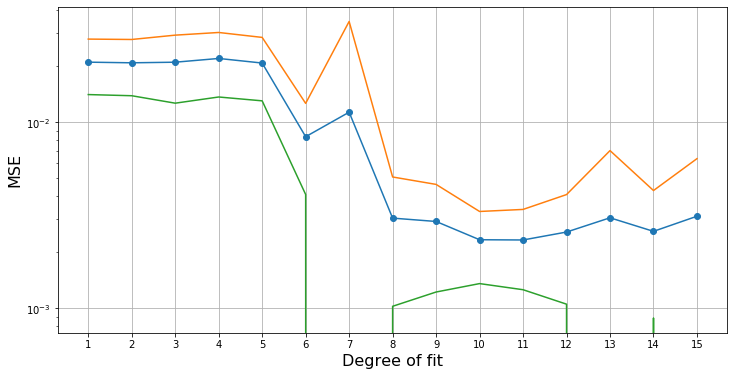

In [23]:
# (g) Make a plot (you may want to use a logarithmic scale on the y-axis) of the error as
#      a function of degree. (As an example, see the middle line, with the dots, below.)


degrees = list(range(1,16)) # list of 15 degrees
plt.plot(degrees,means,marker="o")

# (h) On the same plot, add the mean plus/minus one sigma.
plt.plot(degrees,np.array(means)+2*np.array(sigmas))
plt.plot(degrees,np.array(means)-2*np.array(sigmas))

# plt.ylim(0,100) this may be used to scale the graph by y axes
# finish and label:
plt.grid()
plt.xlabel("Degree of fit",fontsize=16)
plt.ylabel("MSE",fontsize=16)
plt.yscale('log') # not necessarily, but logarithmic scale sort of makes std be more wide and easier to see 
plt.xticks(degrees)
plt.gcf().set_size_inches(12,6)
plt.show()

# (i) Using your own judgment, determine your favorite degree fit.

# seems like degrees 9,10,11 fit the best. in this case. sometimes shows different, especially with log scale

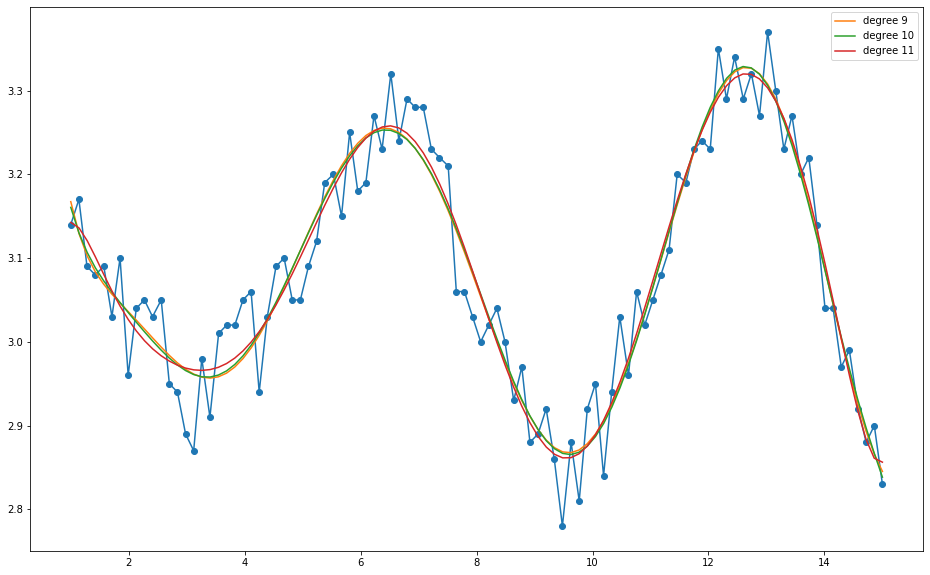

In [24]:
# (j) On a single plot, fit the original data set to the favorite degree fit and plot it.
#     Add the original data as markers.

plt.plot(x, y, marker="o")
xplot = np.linspace(1,15,100) # evenly spaced 100 points in range 1 tp 15
# loop to print multiple degrees. 
for deg in 9,10,11: # let's only plot 3 best fitting degrees
    fit = np.polyfit(x, y, deg)
    yp = np.polyval(fit, xplot)
    plt.plot(xplot, yp, label = "degree " + str(deg))
    
plt.gcf().set_size_inches(16,10)
plt.legend()


## ========================================================================
## lecture/practice

In [82]:
b, a=np.polyfit(x, y, 1)
a, b

(3.0480920701937597, 0.004075991225780028)

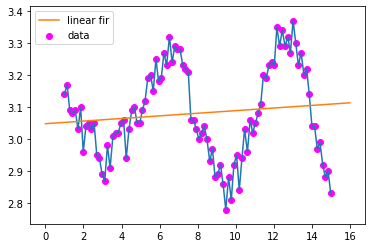

In [83]:
plt.scatter(x,y, marker="o",color="magenta", label="data")
plt.plot(x,y)
plt.plot([0,16],[a+b*0,a+b*16], label="linear fir")
plt.legend()

In [84]:
# create teset & training sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

In [85]:
len(xtrain), len(xtest), len(ytrain), len(ytest)

(75, 25, 75, 25)

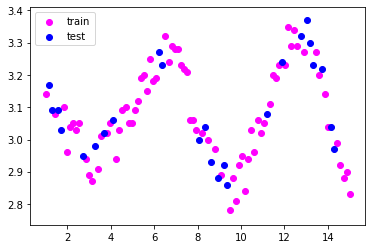

In [86]:
plt.scatter(xtrain,ytrain,label="train",color="magenta")
plt.scatter(xtest,ytest,label="test",color="blue")
plt.legend()

In [87]:
errors = []
for repeat in range (100):
    xtrain, xtest, ytrain, ytest = train_test_split(x,y)
    fit = np.polyfit(xtrain, ytrain, 1)
    ypredicted = np.polyval(fit, xtest)
    MSE = mean_squared_error(ytest, ypredicted) # MSE
    errors.append(MSE)
print(np.mean(errors), np.std(errors))

0.020968603663241464 0.003937534402464229


Text(0.5, 1.0, 'MSE')

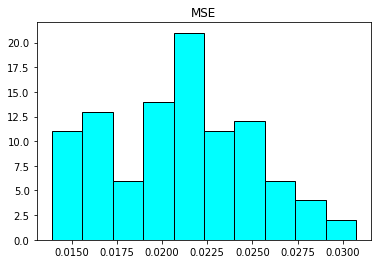

In [88]:
plt.hist(errors,edgecolor="black",color="cyan") 
plt.title("MSE")

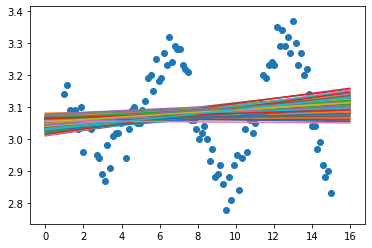

In [89]:
plt.scatter(x, y)
for repeat in range(200):
    xtrain,xtest,ytrain,ytest=train_test_split(x, y)   # split
    b,a=np.polyfit(xtrain,ytrain,1)                   # linear fit
    plt.plot([0,16],[a+b*0, a+b*16])

In [90]:
def fit_a_polynomial(X,Y,degree):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y)
    fit=np.polyfit(xtrain,ytrain,degree) # polynomial coefficients of degree degree
    ypredicted=np.polyval(fit,xtest)     # input: coefficients (ouput of polyfit); output: yvalues
    error=mean_squared_error(ytest,ypredicted)
    return(error)
fit_a_polynomial(x,y,1)

0.017438948558958736

In [91]:
[fit_a_polynomial(x,y,2) for j in range(10)] # MSE for 10 runs of degree

[0.017516629507090074,
 0.023073260529581537,
 0.027908835241889487,
 0.02793083888930308,
 0.022977282234677886,
 0.01706363956200045,
 0.024707087296860757,
 0.029575977144216704,
 0.024257269777231118,
 0.026121431213924358]